# Task 7: Support Vector Machines (SVM)

 1.Load and prepare a dataset for binary classification.

 2.Train an SVM with linear and RBF kernel.

 3.Visualize decision boundary using 2D data.

 4.Tune hyperparameters like C and gamma.

 5.Use cross-validation to evaluate performance.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Data Loading

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
display(df.head())
display(df.info())
display(df.describe())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Exploration


Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


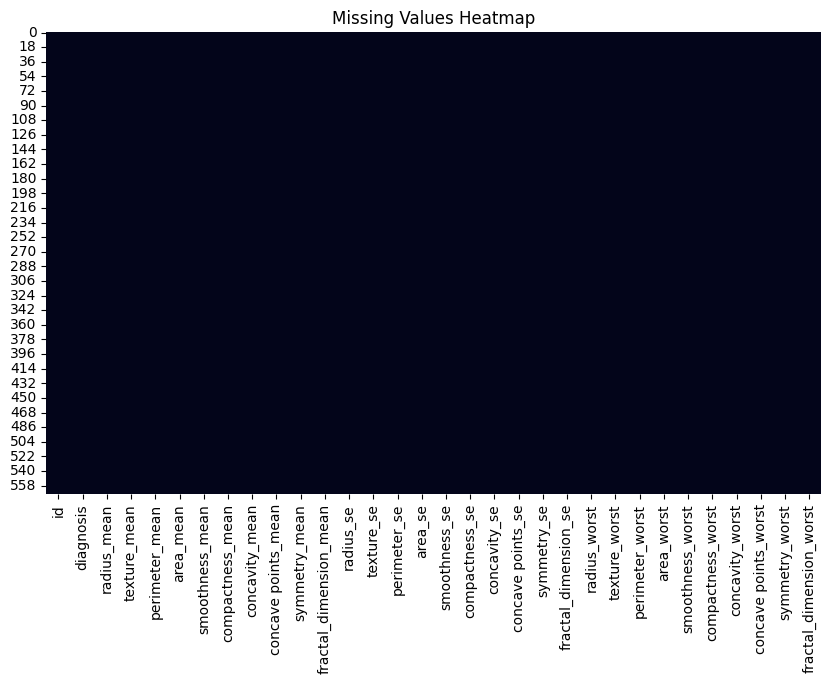

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Target Variable Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


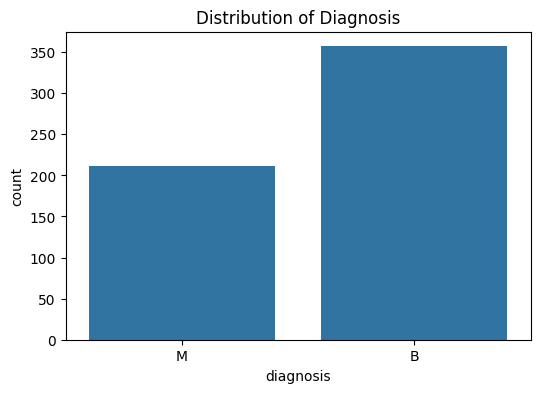

In [5]:
print("Target Variable Distribution:")
print(df['diagnosis'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

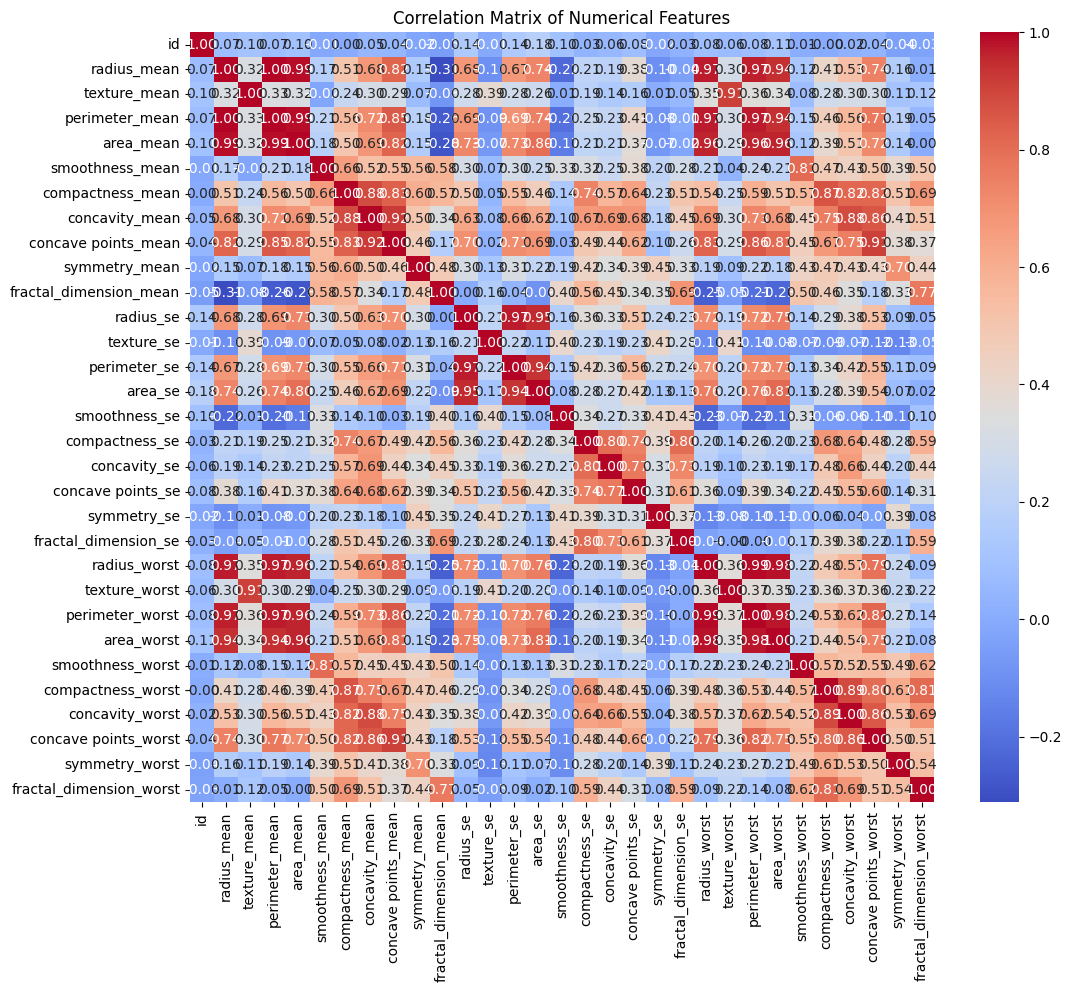

In [6]:
numerical_features = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data Preparation

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [8]:
X = df.drop(columns = ['id', 'diagnosis'])
y = df['diagnosis']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y

# Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


# Model Training

In [11]:
from sklearn.svm import SVC


svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
print("Linear SVM trained successfully.")
svm_rbf.fit(X_train, y_train)
print("RBF SVM trained successfully.")

Linear SVM trained successfully.
RBF SVM trained successfully.


# Model Optimization

In [12]:
param_grid_linear = {'C': [0.1, 1, 10]}
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, scoring='accuracy')
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')

grid_search_linear.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)

best_params_linear = grid_search_linear.best_params_
best_estimator_linear = grid_search_linear.best_estimator_
best_params_rbf = grid_search_rbf.best_params_
best_estimator_rbf = grid_search_rbf.best_estimator_


print("Best hyperparameters for linear kernel SVM:", best_params_linear)
print("Best hyperparameters for RBF kernel SVM:", best_params_rbf)

Best hyperparameters for linear kernel SVM: {'C': 0.1}
Best hyperparameters for RBF kernel SVM: {'C': 10, 'gamma': 0.01}


In [13]:
y_pred_linear = best_estimator_linear.predict(X_test)
y_pred_rbf = best_estimator_rbf.predict(X_test)

# Model Evaluation

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_linear, "Linear SVM")
evaluate_model(y_test, y_pred_rbf, "RBF SVM")

Evaluation metrics for Linear SVM:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-score: 0.9762
AUC: 0.9767
--------------------
Evaluation metrics for RBF SVM:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-score: 0.9762
AUC: 0.9767
--------------------


# Data Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


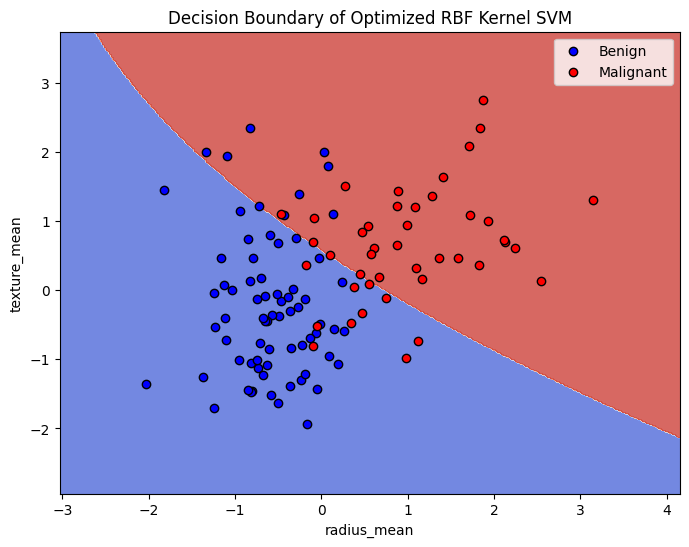

In [15]:
best_estimator = best_estimator_rbf

X_test_2d = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)[['radius_mean', 'texture_mean']] # Keep the original index


x_min, x_max = X_test_2d.iloc[:, 0].min() - 1, X_test_2d.iloc[:, 0].max() + 1
y_min, y_max = X_test_2d.iloc[:, 1].min() - 1, X_test_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


X_predict = pd.DataFrame(np.nan, index=np.arange(len(xx.ravel())), columns=X.columns)
X_predict['radius_mean'] = xx.ravel()
X_predict['texture_mean'] = yy.ravel()
for col in X.columns:
  if col not in ['radius_mean', 'texture_mean']:
    # Access X_test as a DataFrame using .loc[] with column names.
    X_predict[col] = X_test_2d[col].mean() if col in X_test_2d.columns else pd.DataFrame(X_test, columns=X.columns)[col].mean()


Z = best_estimator.predict(X_predict)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


plt.scatter(X_test_2d[y_test == 0]['radius_mean'], X_test_2d[y_test == 0]['texture_mean'], label='Benign', c='blue', edgecolors='k')
plt.scatter(X_test_2d[y_test == 1]['radius_mean'], X_test_2d[y_test == 1]['texture_mean'], label='Malignant', c='red', edgecolors='k')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Decision Boundary of Optimized RBF Kernel SVM')


plt.legend()
plt.show()